Sample correlation coefficient measures the `linear` relationship between exactly `two` variables. 

It is a number between -1 and 1:
- the closer the number is to 1, the stronger the positive linear relationship between the two variables
- the closer the number is to -1, the stronger the negative linear relationship between the two variables
- the closer the number is to 0, the weaker the linear relationship between the two variables.

It can be calculated using the following formula:

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

where:
- $r$ is the sample correlation coefficient
- $n$ is the number of data points
- $x_i$ and $y_i$ are the $i$-th data points of the two variables
- $\bar{x}$ and $\bar{y}$ are the means of the two variables
- $\sum$ denotes the sum of the terms

`Linear` relationship means that the relationship between the two variables can be described by a straight line. 

![lin_nonlin_corr.png](lin_nonlin_corr.png)



In [25]:
import numpy as np
from matplotlib import pyplot as plt

Let's create some example datasets

In [14]:
# Positive correlation: age - income
ages = np.array([58, 48, 34, 27, 40, 58, 38, 42, 30, 30])
incomes = np.array([56275.74, 61024.79, 49966.72, 42114.16, 66390.01, 109120.80, 43727.17, 42452.81, 26298.26, 53319.05])

# Negative correlation: hours of daily exercise and resting heart rate
hours = np.array([2, 3, 1, 1, 4, 1, 4, 0, 3, 4])
resting_heart_rates = np.array([67.23, 63.05, 70.43, 78.47, 49.19, 75.17, 43.07, 73.22, 63.97, 43.51])

# No correlation: numnber of books read and shoe size
n_books_read = np.array([85, 13, 89, 27, 86, 77, 87, 1, 25, 13])
shoe_sizes = np.array([10, 8, 7, 8, 5, 8, 5, 8, 11, 5])

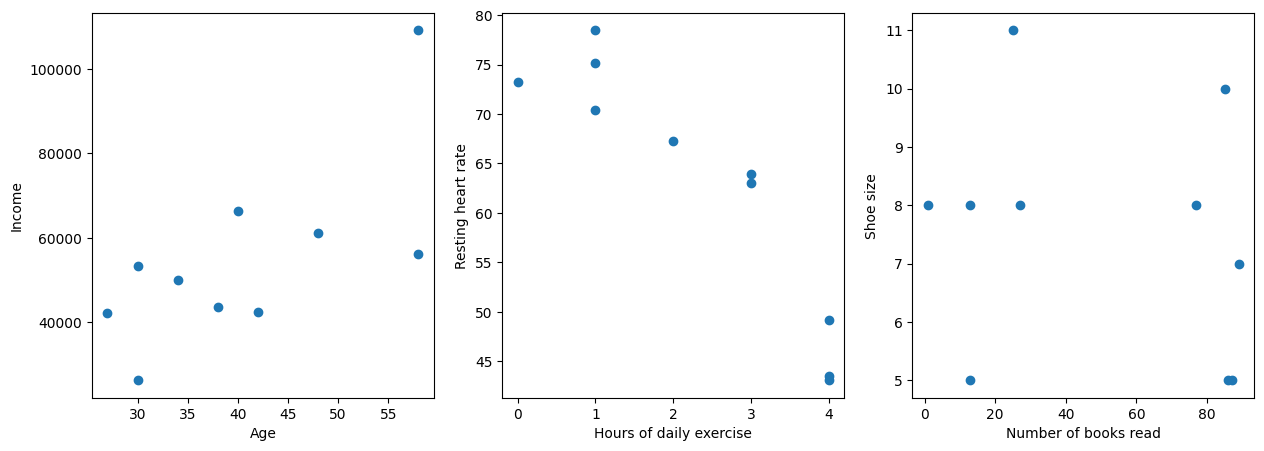

In [15]:
# Plot them
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(ages, incomes)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Income')

axs[1].scatter(hours, resting_heart_rates)
axs[1].set_xlabel('Hours of daily exercise')
axs[1].set_ylabel('Resting heart rate')

axs[2].scatter(n_books_read, shoe_sizes)
axs[2].set_xlabel('Number of books read')
axs[2].set_ylabel('Shoe size')

plt.show()

Let's create a function that calculates the sample correlation coefficient between two variables, with for loops to demonstrate the calculation step by step.

In [16]:
def r_for(x: np.ndarray, y: np.ndarray) -> float:
    """
    Calculate the sample correlation coefficient between two array of numbers.
    
    Args:
       x: array of numbers
       y: array of numbers
    Returns:
       float: sample correlation coefficient
    """
    # calculate the mean of x and y with for loops
    x_mean = 0
    y_mean = 0
    for i in range(len(x)):
        x_mean += x[i]
        y_mean += y[i]
    x_mean /= len(x)
    y_mean /= len(y)
    
    # use for loops to calculate the numerator
    numerator = 0
    x_diff = []
    y_diff = []
    for i in range(len(x)):
        x_diff.append(x[i] - x_mean)
        y_diff.append(y[i] - y_mean)
    
    for i in range(len(x)):
        numerator += x_diff[i] * y_diff[i]
    
    # use for loops to calculate the denominator
    x_denominator = 0
    y_denominator = 0
    
    for i in range(len(x)):
        x_denominator += x_diff[i] ** 2
        y_denominator += y_diff[i] ** 2
    
    return numerator / ((x_denominator * y_denominator) ** 0.5)


Let's implement the same function but with numpy function calls.

In [26]:
def r_numpy(x:list, y:list) -> float:
    """
    Calculate the sample correlation coefficient between two lists of numbers.
    
    Args:
       x: list of numbers
       y: list of numbers
    Returns:
       float: sample correlation coefficient
    """
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_diff = x - x_mean
    y_diff = y - y_mean
    return np.sum(x_diff * y_diff) / np.sqrt(np.sum(x_diff ** 2) * np.sum(y_diff ** 2))

By the way, numpy can do it for us without function writing... :) 

In [22]:
print("Ages - Incomes")
print(f"For loop: {r_for(ages, incomes)}")
print(f"Numpy functions: {r_numpy(ages, incomes)}")
print(f"Pure numpy: {np.corrcoef(ages, incomes)[0, 1]}")

Ages - Incomes
For loop: 0.6948072396122452
Numpy functions: 0.6948072396122452
Pure numpy: 0.6948072396122452


Let's compute `r` for the example datasets and compare the results of the three methods.

In [27]:
r_ages_incomes = r_numpy(ages, incomes)
r_hours_heart_rate = r_numpy(hours, resting_heart_rates)
r_books_shoes = r_numpy(n_books_read, shoe_sizes)

In [28]:
print(f"Ages - Incomes: {r_ages_incomes}")
print(f"Hours - Heart rate: {r_hours_heart_rate}")
print(f"Books - Shoes: {r_books_shoes}")

Ages - Incomes: 0.6948072396122452
Hours - Heart rate: -0.9123093532252169
Books - Shoes: -0.2175373770690159
